In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


In [2]:
df= pd.read_csv("PJME_hourly.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set the 'Datetime' column as the index
df.set_index('Datetime', inplace=True)

# Now you can check the first few rows to confirm the changes
print(df.head())
# df.set_index('Datetime')

                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0


In [3]:
pd.to_datetime(df.index)

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


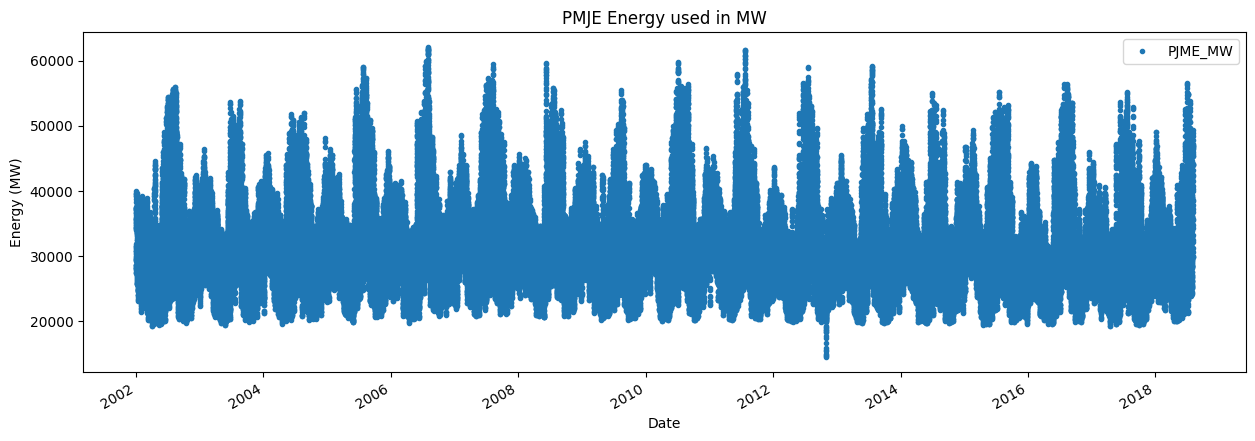

In [5]:
color_pal=sns.color_palette()
ax = df.plot(style='.', figsize=(15, 5), color=color_pal, title='PMJE Energy used in MW')

# Add axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Energy (MW)')

# Show the plot
plt.show()

Train Test / Split


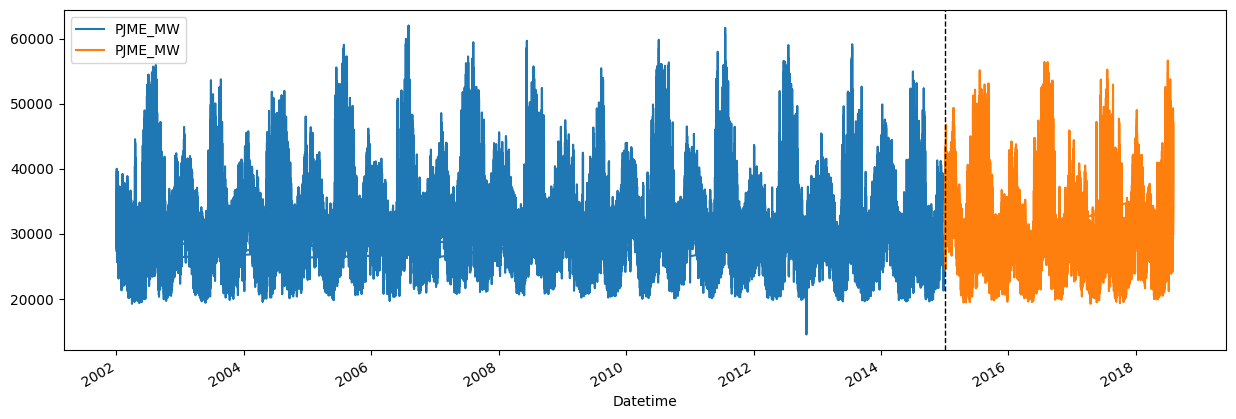

In [8]:


train = df.loc[df.index < '2015-01-01']
test = df.loc[df.index >= '2015-01-01']

fig, ax = plt.subplots(figsize=(15, 5))

train.plot(ax=ax, label='Training set')
test.plot(ax=ax, label='Testing set')

# Adding a black dotted line at '2015-01-01'
ax.axvline(x='2015-01-01', color='black', linestyle='--', linewidth=1)

plt.legend()
plt.show()


FEATURE CREATION


In [10]:
filtered_data = filtered_data.reindex(pd.date_range(start='2010-01-01', end='2010-01-08', freq='D'))


In [11]:
filtered_data = filtered_data.interpolate()

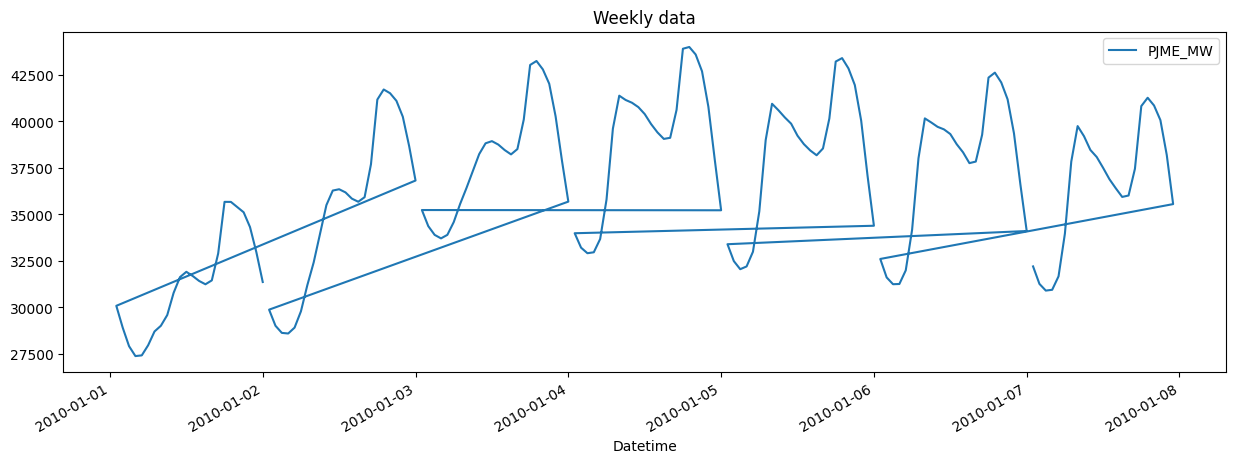

In [12]:
# Filter the data for the specified date range
filtered_data = df.loc[(df.index > '2010-01-01') & (df.index < '2010-01-08')]

# Plot the filtered data
filtered_data.plot(figsize=(15, 5), title='Weekly data')

# Show the plot
plt.show()